In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score , classification_report, confusion_matrix, precision_score, recall_score, f1_score

from sklearn.preprocessing import StandardScaler

from KNN_model import load_data, train_model, split_data

In [4]:
df = load_data()
# 2. Chuẩn bị dữ liệu
X = df[['BMI', 'PhysicalHealth']] 
y = df['HeartDisease']
# 3. Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 4. Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
# 5. Tìm k tối ưu
k_range = range(1, 31)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())

optimal_k = k_range[k_scores.index(max(k_scores))]
print(f"Giá trị k tối ưu: {optimal_k}")

Giá trị k tối ưu: 30


Accuracy: 91.28%
Precision: 62.30%
Recall: 0.68%
F1: 1.34%


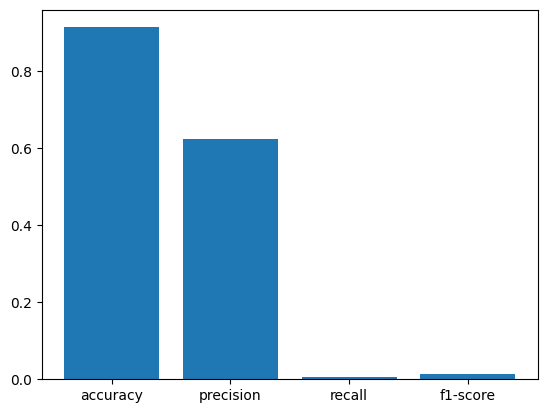

In [6]:
y_pred, model, accuracy, precision, recall, f1 = train_model(30)

print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1: %.2f%%" % (f1 * 100.0))

plt.bar(['accuracy','precision', 'recall', 'f1-score'], [accuracy, precision, recall, f1])
plt.show()

**Nhận xét**: 

- Độ chính xác (Accuracy) đạt 91.28%: Điều này cho thấy mô hình đã dự đoán đúng một tỷ lệ lớn các mẫu dữ liệu. Tuy nhiên, đây không phải là chỉ số đánh giá hiệu suất duy nhất và có thể gây hiểu nhầm trong một số trường hợp, đặc biệt khi dữ liệu không cân bằng.
- Độ chính xác (Precision) thấp (62.3%) và độ nhạy (Recall) rất thấp (0.68%): Điều này cho thấy mô hình có thể đang gặp vấn đề trong việc phân loại đúng các mẫu dương. Cụ thể:
- Precision thấp: Mô hình thường dự đoán sai các mẫu dương thành mẫu âm.
- Recall thấp: Mô hình bỏ sót nhiều mẫu dương thực tế.
- F1-score rất thấp (1.34%): F1-score là trung bình hài hòa của Precision và Recall, giá trị thấp cho thấy cả Precision và Recall đều thấp, mô hình không đạt hiệu suất tốt trong việc phân loại.

### Tổng quan đánh giá mô hình:
Mặc dù độ chính xác tổng thể cao nhưng các chỉ số Precision, Recall và F1-score lại rất thấp cho thấy mô hình hiện tại chưa đạt được hiệu suất mong muốn. Cần tiến hành phân tích sâu hơn để tìm ra nguyên nhân chính xác và đưa ra các giải pháp cải thiện.


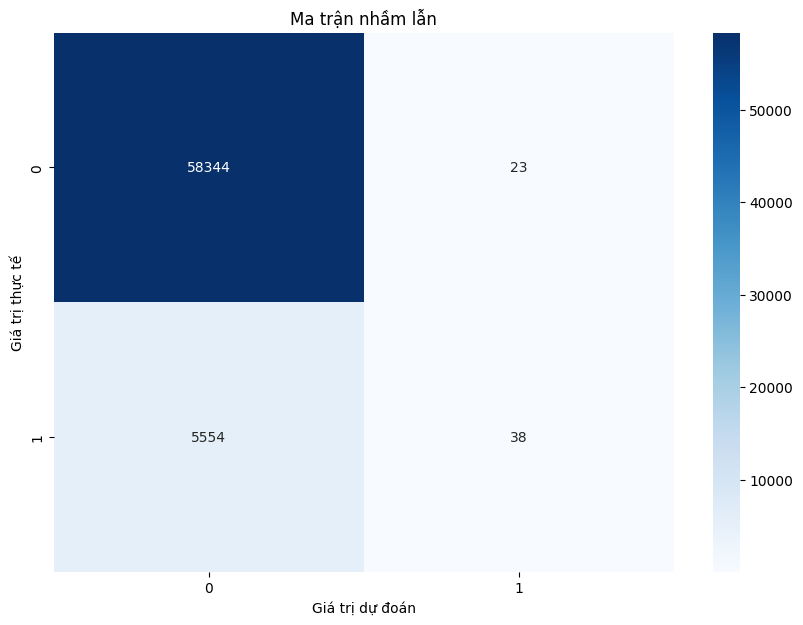

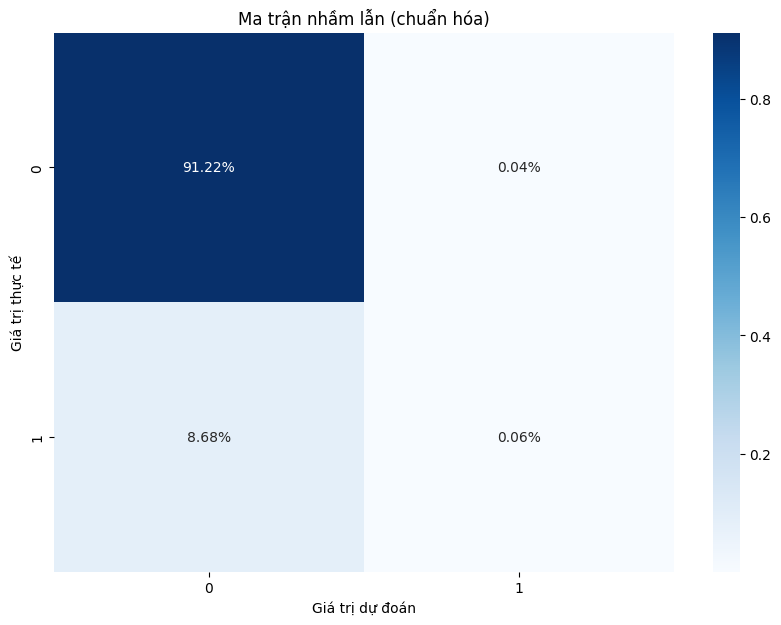

In [7]:
# X_train, X_test, y_train, y_test = split_data(load_data())
# Ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)

# Vẽ biểu đồ heatmap cho ma trận nhầm lẫn
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Ma trận nhầm lẫn')
plt.ylabel('Giá trị thực tế')
plt.xlabel('Giá trị dự đoán')
plt.show()

# Vẽ biểu đồ chuẩn hóa
plt.figure(figsize=(10,7))
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')
plt.title('Ma trận nhầm lẫn (chuẩn hóa)')
plt.ylabel('Giá trị thực tế')
plt.xlabel('Giá trị dự đoán')
plt.show()

**Nhận xét**:

- Số trường hợp cũng như tỷ lệ mà mô hình dự đoán đúng là không mắc bệnh tim ở lớp "0" là quá lớn . Thể hiện rằng mô hình hoạt động tốt trong việc nhận diện các mẫu không mắc bệnh. Đồng thời, có 5592 trường hợp thực sự mắc bệnh tim nhưng mô hình lại dự đoán là không không mắc bệnh . Đây là một lượng âm tính giả (False Nagatives) đáng kể, và điều này có thể gây nguy hiểm vì mô hình đã bỏ sót khá nhiều số trường hợp mắc bệnh.

- Bên cạnh đó, biều đồ không có giá trị nào cho dự đoán là mắc bệnh ở lớp "1", tức là tất cả các trường hợp dự đoán đều nằm ở lớp "0" là không mắc bệnh

=> Mô hình hiện tại đang bị mất cân bằng nghiêm trọng, vì nó chỉ dự đoán được lớp không mắc bệnh mà không có khả năng phát hiện lớp mắc bệnh, với tỷ lệ bỏ sót khá cao là 8.74% cho thấy mô hình không hoạt động tốt trong việc phát hiện các trường hợp mắc bệnh tim, trong đó số lượng mẫu không mắc bệnh chiếm ưu thế hơn so với số lượng mẫu mắc bệnh.

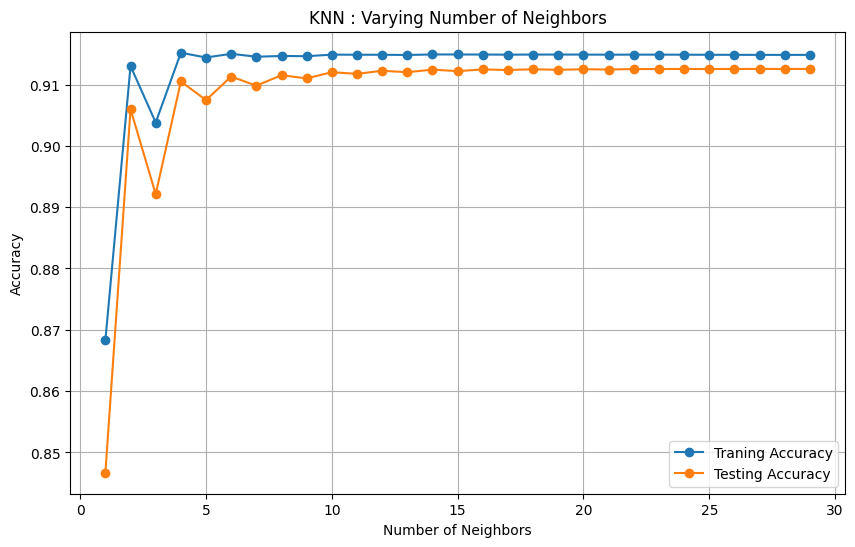

In [8]:
k_values = list(range(1, 30))

train_accuracies = []
test_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
                           
plt.figure(figsize=(10 ,6))
plt.title("KNN : Varying Number of Neighbors")
plt.plot(k_values,train_accuracies, label="Traning Accuracy", marker='o')
plt.plot(k_values,test_accuracies, label="Testing Accuracy", marker='o')
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

**Nhận xét**:

- Độ chính xác trên tập huấn luyện:

    - Tăng dần: Khi số lượng neighbors tăng, độ chính xác trên tập huấn luyện cũng tăng dần và đạt mức ổn định ở khoảng k = 5. Điều này cho thấy mô hình ngày càng "học thuộc lòng" dữ liệu huấn luyện khi k tăng.
 
- Độ chính xác trên tập kiểm thử:

    - Tăng ban đầu, sau đó giảm: Độ chính xác trên tập kiểm thử tăng ban đầu khi k tăng từ 1 đến khoảng 5, đạt đỉnh ở khoảng này. Tuy nhiên, khi k tiếp tục tăng, độ chính xác trên tập kiểm thử lại giảm dần.

- Overfitting:

    - Khi k quá nhỏ (ví dụ k = 1), mô hình dễ bị overfitting, tức là mô hình học quá kỹ dữ liệu huấn luyện đến mức không thể generalize tốt trên dữ liệu mới (tập kiểm thử). Điều này dẫn đến độ chính xác trên tập huấn luyện cao nhưng độ chính xác trên tập kiểm thử lại thấp.
    - Ngược lại, khi k quá lớn, mô hình trở nên quá đơn giản, không thể bắt được các pattern phức tạp trong dữ liệu. Điều này dẫn đến cả độ chính xác trên tập huấn luyện và tập kiểm thử đều thấp.

**Kết luận**:

- Giá trị k tối ưu: Dựa trên biểu đồ, giá trị k tối ưu là 30, nơi độ chính xác trên tập kiểm thử đạt mức cao nhất và mô hình có khả năng tổng quát hóa tốt nhất.
- Hiện tượng overfitting và underfitting: Biểu đồ minh họa rõ ràng hiện tượng overfitting và underfitting khi thay đổi giá trị k.
- Cân bằng giữa độ phức tạp của mô hình và khả năng tổng quát hóa: Việc chọn giá trị k phù hợp là một trade-off giữa độ phức tạp của mô hình và khả năng tổng quát hóa. Một mô hình quá phức tạp dễ bị overfitting, trong khi một mô hình quá đơn giản lại không thể bắt được các pattern phức tạp trong dữ liệu.